# Life Expectancy And GDP

## Include external libraries

In [151]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.gridspec as gridspec
import seaborn as sns
import statsmodels.api as sm
import math

## Read From CSV

In [37]:
data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Understanding Data Imported from CSV

In [38]:
data.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [44]:
# Rename the column "Life expectancy at birth (years)" for simplicity 
data = data.rename({"Life expectancy at birth (years)":"Life_Exp"}, axis=1)

In [45]:
# Get the data types of each column
data.dtypes

Country      object
Year          int64
Life_Exp    float64
GDP         float64
dtype: object

In [43]:
# Find number of unique values in each column
data.nunique()

Country      6
Year        16
Life_Exp    69
GDP         96
dtype: int64

In [11]:
# Find the missing valkues if any
data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

## GDP and Life Expectancy Analysis

In [130]:
for c in data.Country.unique():
    data_sub = data[data.Country == c]
    print("Country: {0}".format(c))
    print(data_sub[['GDP','Life_Exp']].describe())
    print(data_sub[['GDP','Life_Exp']].corr())

Country: Chile
                GDP   Life_Exp
count  1.600000e+01  16.000000
mean   1.697888e+11  78.943750
std    7.687884e+10   1.058911
min    6.973681e+10  77.300000
25%    9.387303e+10  77.975000
50%    1.729975e+11  79.000000
75%    2.449515e+11  79.825000
max    2.783840e+11  80.500000
               GDP  Life_Exp
GDP       1.000000  0.949877
Life_Exp  0.949877  1.000000
Country: China
                GDP   Life_Exp
count  1.600000e+01  16.000000
mean   4.957714e+12  74.262500
std    3.501096e+12   1.318016
min    1.211350e+12  71.700000
25%    1.881585e+12  73.400000
50%    4.075195e+12  74.450000
75%    7.819550e+12  75.250000
max    1.106470e+13  76.100000
               GDP  Life_Exp
GDP       1.000000  0.908526
Life_Exp  0.908526  1.000000
Country: Germany
                GDP  Life_Exp
count  1.600000e+01  16.00000
mean   3.094776e+12  79.65625
std    6.674862e+11   0.97500
min    1.949950e+12  78.00000
25%    2.740870e+12  78.95000
50%    3.396350e+12  79.85000
75%    3.59

In [200]:
def plot_boxplot_per_country(df, col, ax):

    if col!='GDP' and col!='Life_Exp':
        print(f"Invalid Column {col}")
        return
    
    # Create box plot
    sns.boxplot(x='Country', y=col, data=df, ax = ax)

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    # Add labels and title
    ax.set_xlabel('Country')
    ax.set_ylabel(col)
    ax.set_title('{0} per Country'.format(col))
    
def scatter_gdp_vs_life_exp_for_country(df, country_name, axs=None, clr=None):
    # Filter the dataset for the selected country
    country_data = df[df['Country'] == country_name]
    
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    
    if not axs:
        print("axis not defined")
        return
    
    _y = country_data['Life_Exp']
    _x = country_data['GDP']
    
    if not clr:
         sns.scatterplot(x = _x, y = _y, ax = axs)
    else:
         sns.scatterplot(x = _x, y = _y, ax = axs, color = clr)
    axs.set_title(f"Country : {country_name}")
    
def scatter_gdp_vs_life_exp():
    pltTotal = data.Country.nunique()
    colTotal = 3
    rowTotal = math.ceil(pltTotal / colTotal)
    
    # Seaborn color palette
    palette = sns.color_palette("husl", pltTotal)
    
    # Create a figure
    fig = plt.figure(figsize=(12, 10))

    # Define the grid (2 rows, 3 columns)
    gs = gridspec.GridSpec(rowTotal, colTotal, figure=fig)
    
    countries = data.Country.unique()
    ind = 0
    for row in range(rowTotal):
        for col in range(colTotal):
            ax = fig.add_subplot(gs[row, col])
            scatter_gdp_vs_life_exp_for_country(data, countries[ind], ax, clr=palette[ind])
            ind+=1
            
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    plt.clf()
    
def plot_gdp_vs_life_expectancy(df, country_name):
    # Filter the dataset for the selected country
    country_data = df[df['Country'] == country_name]
    
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    
    y = country_data['Life_Exp']
    x = country_data['GDP']
    
    # linear regression
    model = sm.OLS.from_formula('Life_Exp ~ GDP', data = country_data)
    results = model.fit()
    
    # Create a figure
    fig = plt.figure(figsize=(12, 10))

    # Define the grid (2 rows, 2 columns)
    gs = gridspec.GridSpec(2, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :])  # 1st row, spanning both columns
    ax2 = fig.add_subplot(gs[1, 0])  # 2nd row, 1st Column
    ax3 = fig.add_subplot(gs[1, 1])  # 2nd row, 2nd Column
    
    # Create scatter plot
    sns.scatterplot(x=country_data['GDP'], y=country_data['Life_Exp'], ax = ax1)
    
    fitted_values = results.predict(x)
    
    # Add Linear regression line:
    ax1.plot(x, fitted_values, color="Red")
    
    # Residuals / Errors
    residuals = y - fitted_values

    # Add labels and title
    ax1.set_xlabel('GDP')
    ax1.set_ylabel('Life Expectancy at Birth (Years)')
    ax1.set_title(f'GDP vs. Life Expectancy in {country_name}')

    
    ax2.hist(residuals)
    ax2.set_title(f'GDP vs. Life Expectancy Residual/Error Histogram for {country_name}')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(residuals)

    # Plot the normal distribution curve
    xmin, xmax = ax2.get_xlim()  # Get x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax2.plot(x, p * len(residuals) * (x[1] - x[0]), linewidth=2, color="Red")  # Scaling factor for the plot
    
    # Calculate the correlation matrix
    correlation_matrix = country_data[['GDP', 'Life_Exp']].corr()
    # Plotting the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1, ax=ax3)
    ax3.set_title('Corr between GDP and Life Expectancy')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    plt.clf()
    
    # Show Lnear Regression results
    print(results.params)

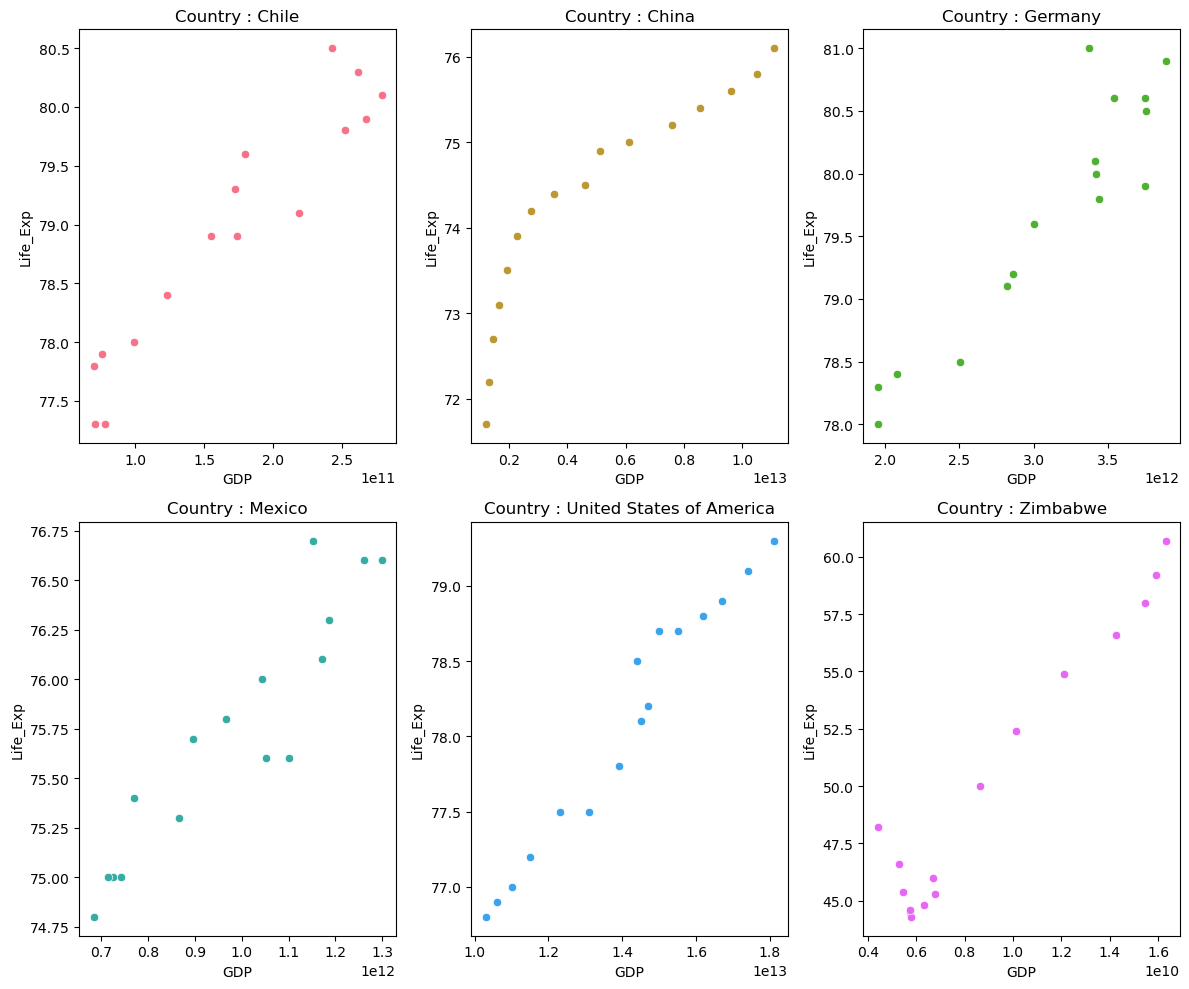

<Figure size 640x480 with 0 Axes>

In [201]:
scatter_gdp_vs_life_exp()

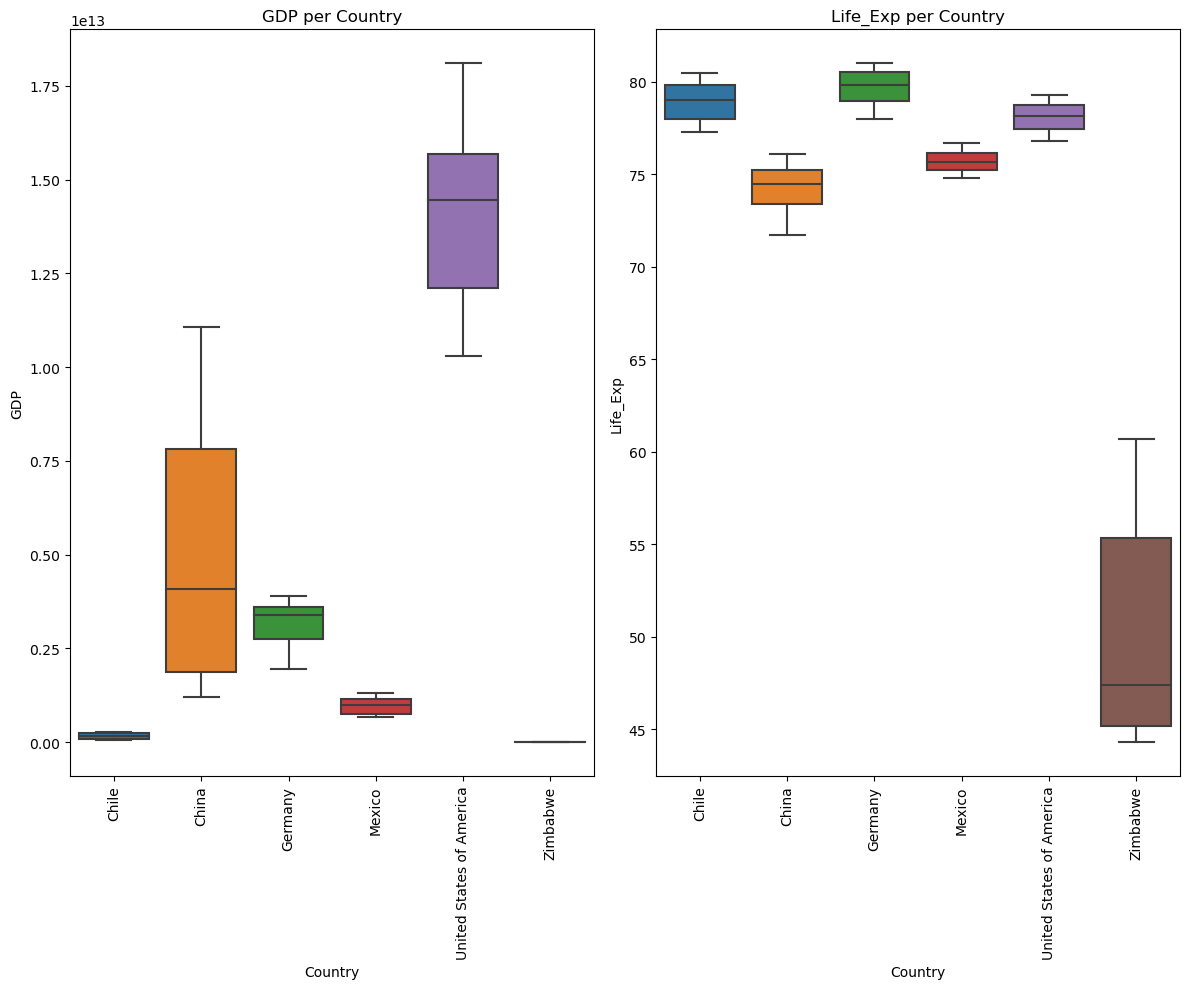

<Figure size 640x480 with 0 Axes>

In [177]:
# Create a figure
fig = plt.figure(figsize=(12, 10))

# Define the grid (1 rows, 2 columns)
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])  

plot_boxplot_per_country(data, 'GDP', ax1)
plot_boxplot_per_country(data, 'Life_Exp', ax2)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
plt.clf()

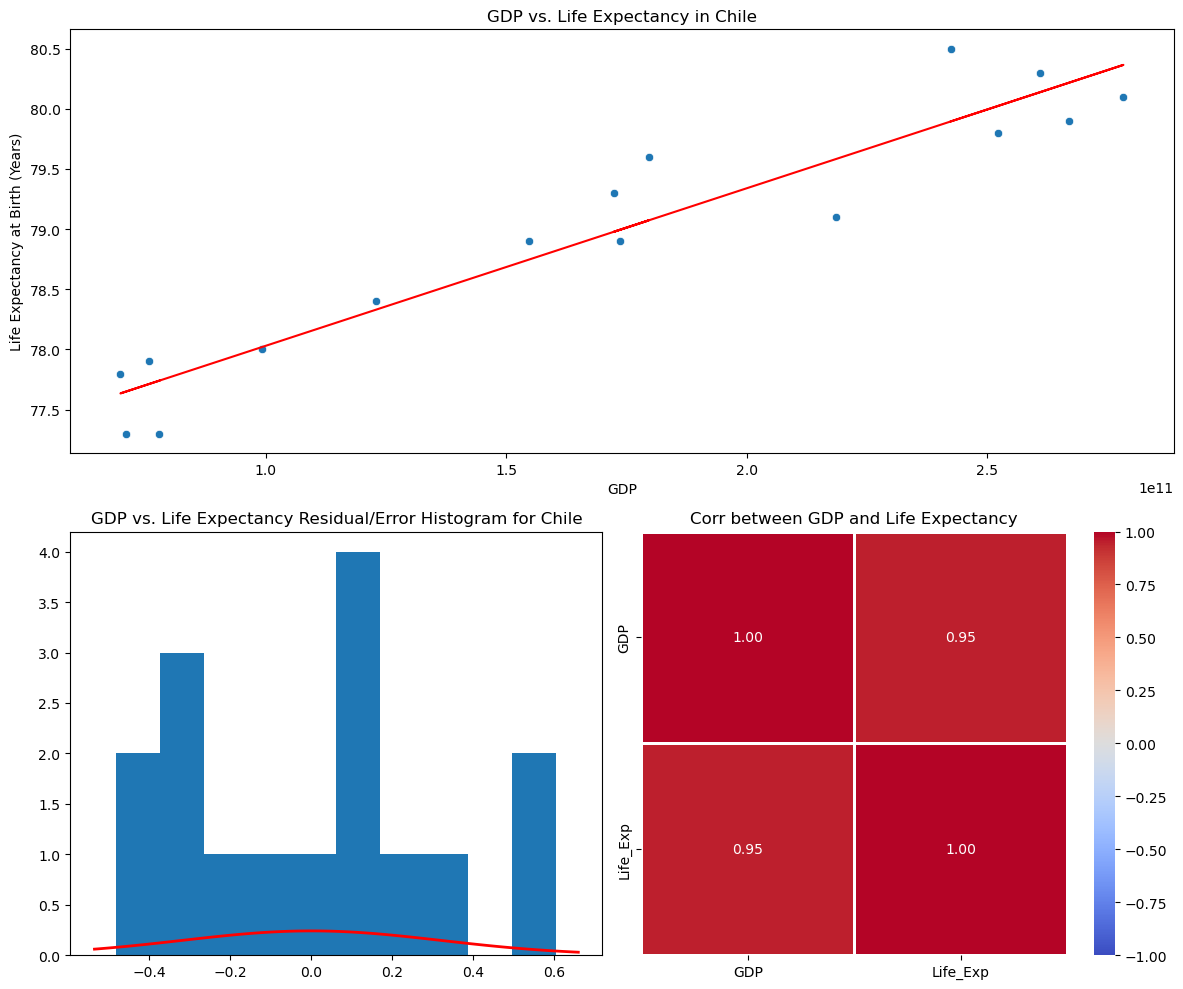

Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64


<Figure size 640x480 with 0 Axes>

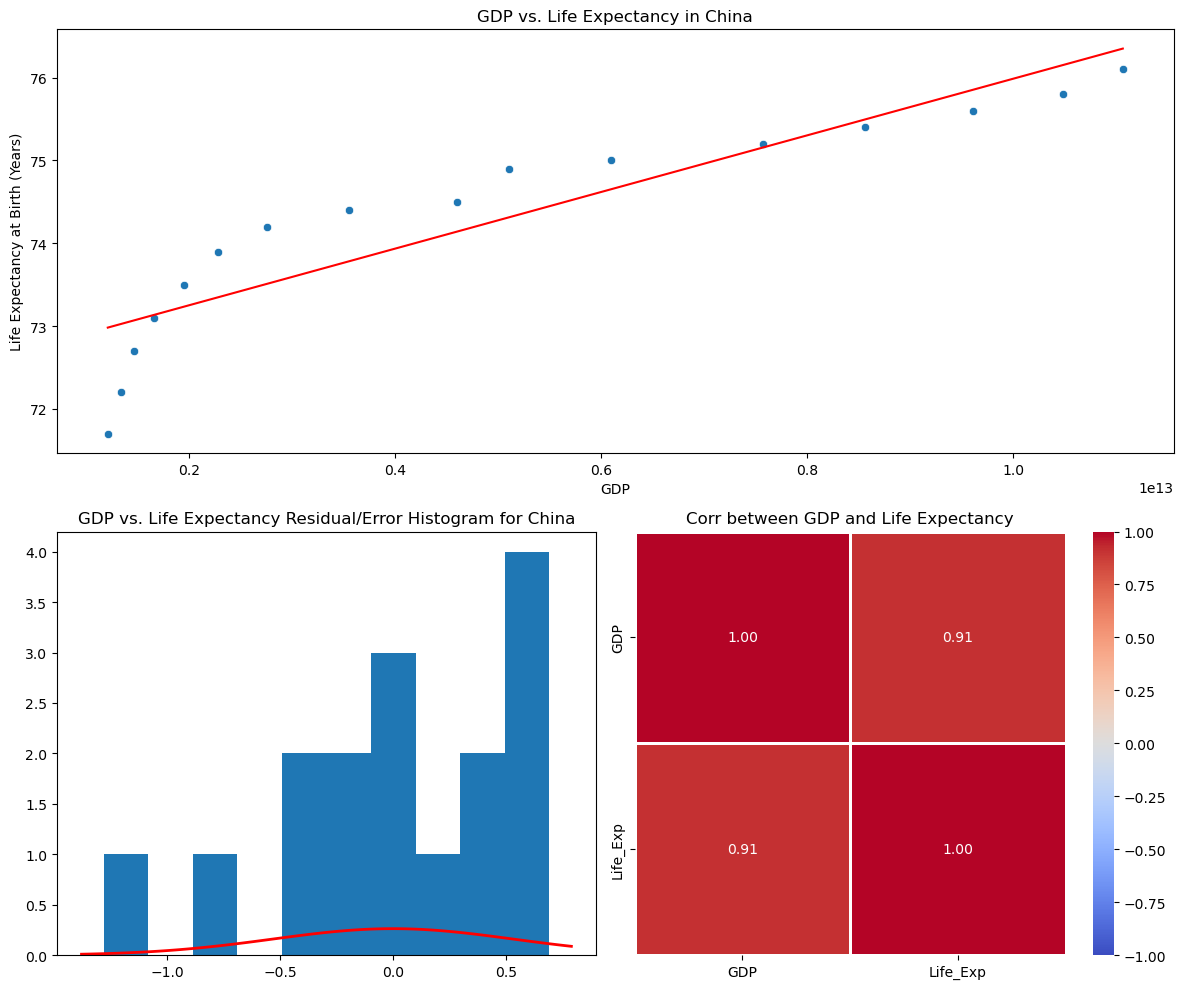

Intercept    7.256685e+01
GDP          3.420219e-13
dtype: float64


<Figure size 640x480 with 0 Axes>

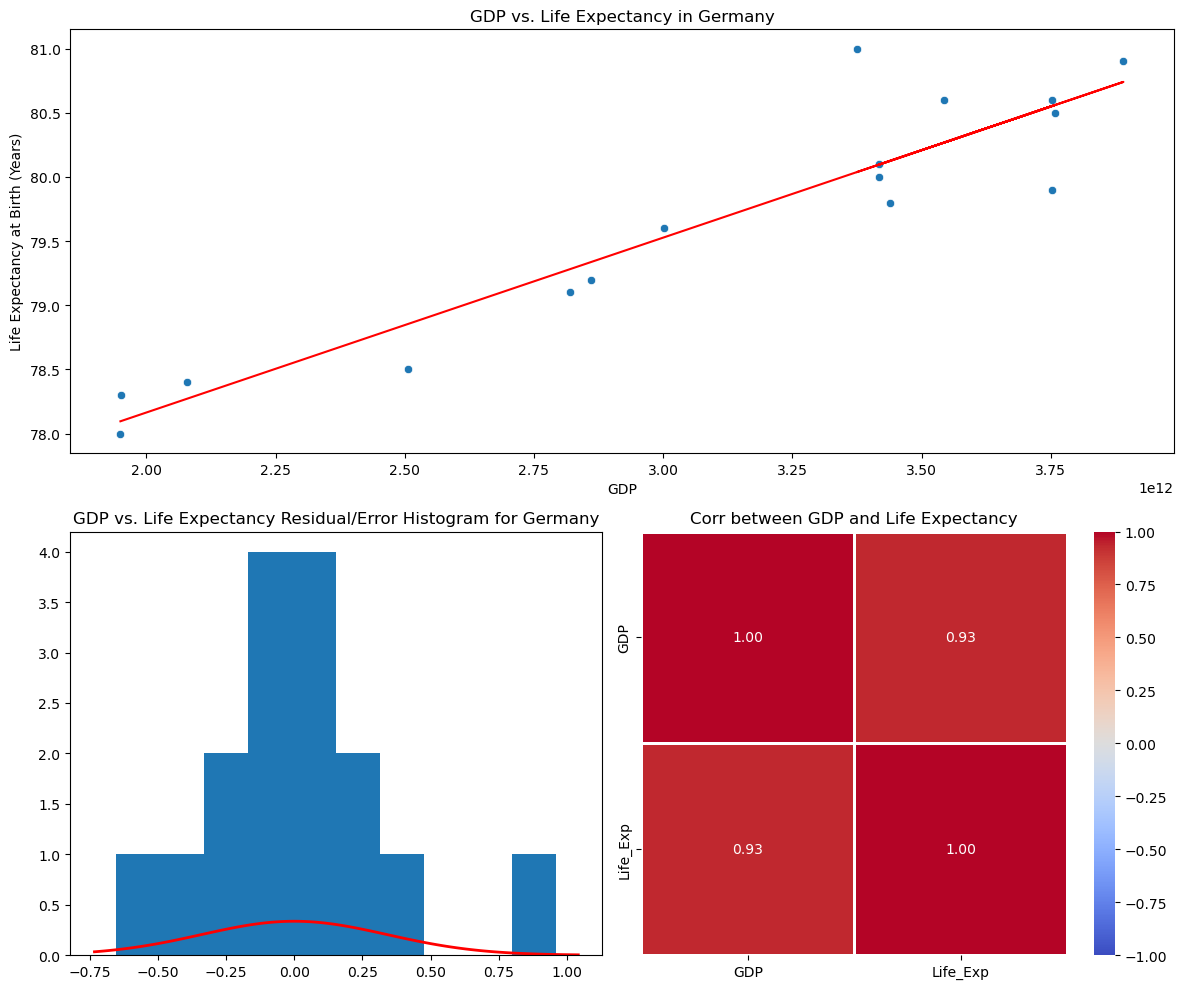

Intercept    7.543994e+01
GDP          1.362397e-12
dtype: float64


<Figure size 640x480 with 0 Axes>

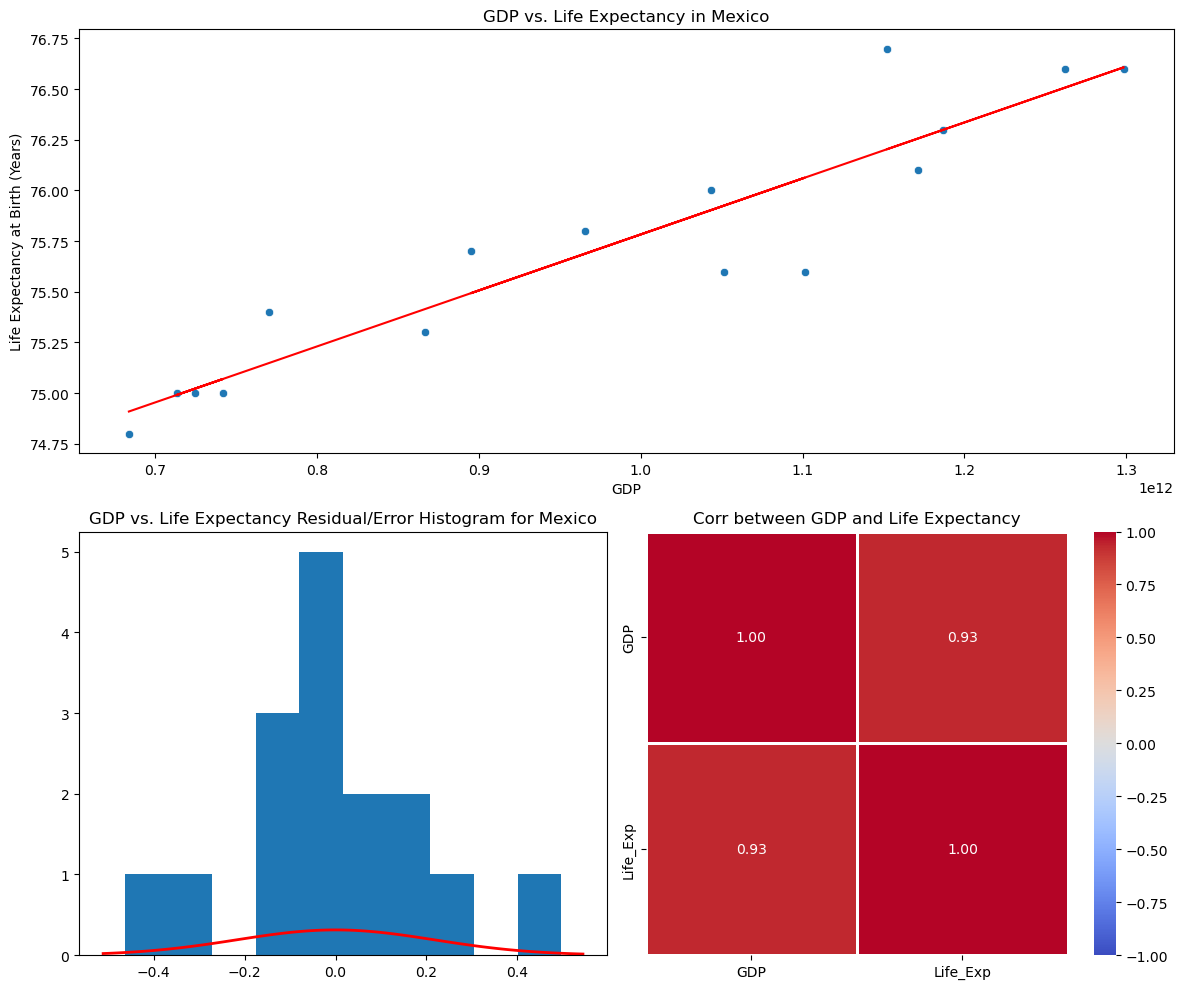

Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64


<Figure size 640x480 with 0 Axes>

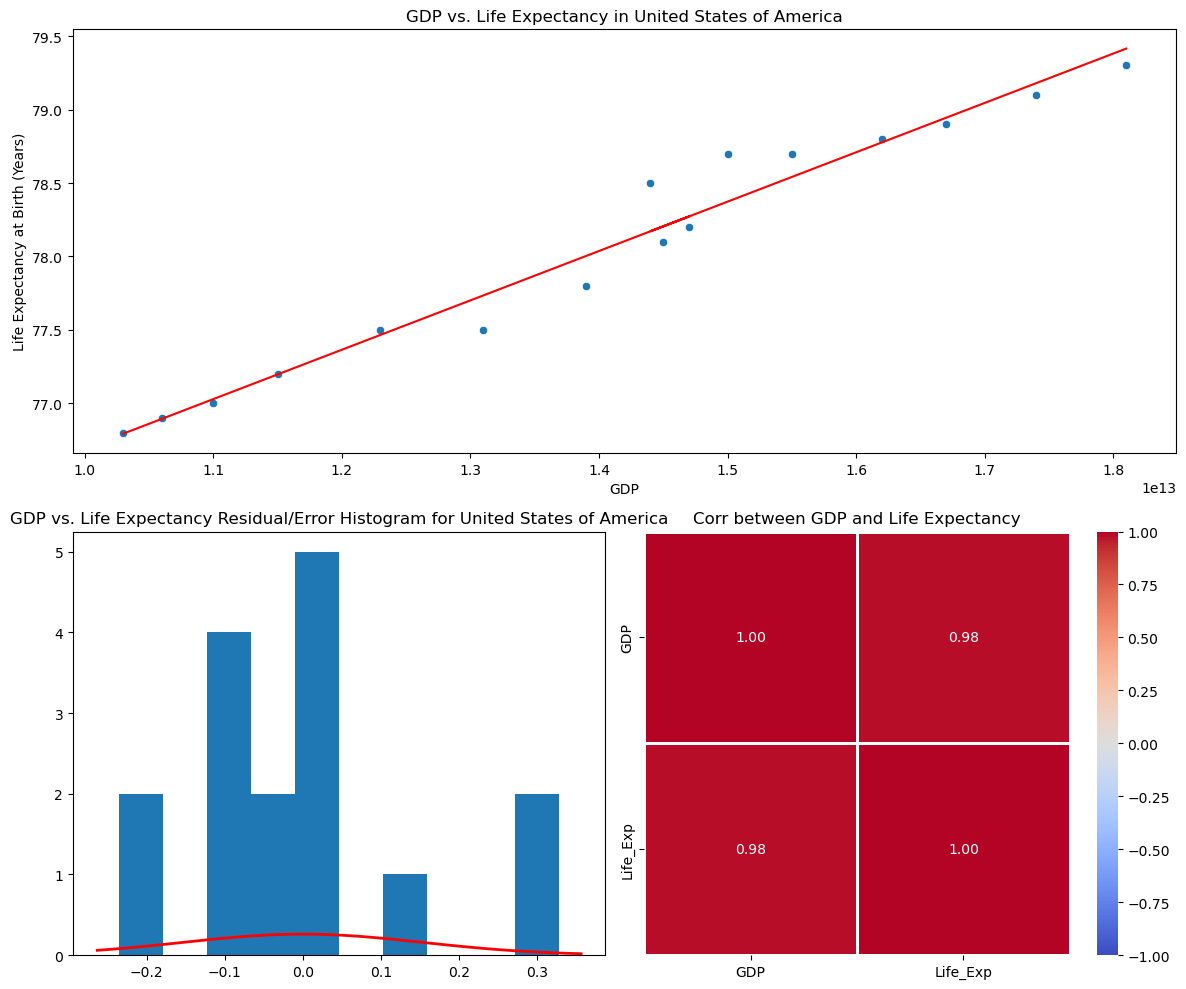

Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64


<Figure size 640x480 with 0 Axes>

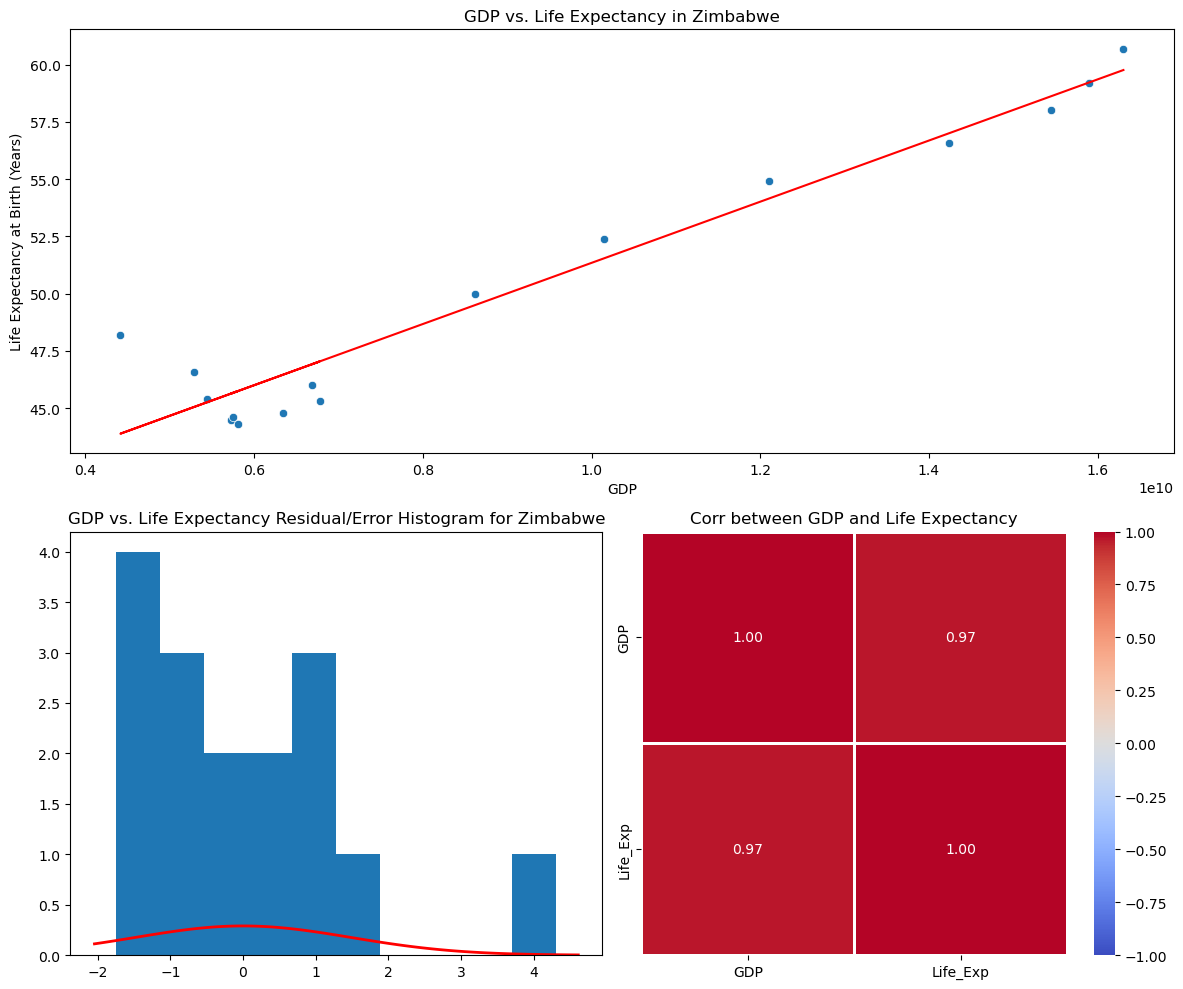

Intercept    3.799250e+01
GDP          1.335299e-09
dtype: float64


<Figure size 640x480 with 0 Axes>

In [143]:
for c in data.Country.unique():
    plot_gdp_vs_life_expectancy(data, c)

In [202]:
def plot_per_year(df, country, col, ax):
    if col not in ['GDP', 'Life_Exp']:
        print(f"Invalid Column {col}")
        return
    
    country_data = df[df['Country'] == country]
    x = country_data['Year']
    y = country_data[col]
    
    # Create line plot
    ax.plot(x, y, marker='o', linestyle='-')

    # Set x-axis ticks explicitly
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)  # Rotate labels properly

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.set_title(f'{col} per Year for {country}')
    
def plot_per_year_normalized(df, country, ax):
    country_data = df[df['Country'] == country]
    x = country_data['Year']
    y1 = country_data['GDP']
    y2 = country_data['Life_Exp']
    
    # Normalize values between 0 and 1
    y1_normalized = (y1 - y1.min()) / (y1.max() - y1.min())
    y2_normalized = (y2 - y2.min()) / (y2.max() - y2.min())
    
    # Create line plot
    ax.plot(x, y1_normalized, color="blue", marker='o', linestyle='-', label="GDP (normalized)")
    ax.plot(x, y2_normalized, color="red", marker='x', linestyle='-', label="Life Expectancy (normalized)")

    # Set x-axis ticks explicitly
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)  # Rotate labels properly

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel("Normalized Values")
    ax.set_title(f'Normalized GDP and Life Expectancy per Year for {country}')
    
    # Add legend
    ax.legend()
    
def plot_gdp_and_life_exp_per_year():
    pltTotal = data.Country.nunique() * 2
    colTotal = 2
    rowTotal = data.Country.nunique()
    
    # Create a figure
    fig = plt.figure(figsize=(14, 12))

    # Define the grid (2 rows, 3 columns)
    gs = gridspec.GridSpec(rowTotal, colTotal, figure=fig)
    
    countries = data.Country.unique()
    ind = -1
    for row in range(rowTotal):
        ind+=1
        for col in range(colTotal):
            ax = fig.add_subplot(gs[row, col])
            plot_per_year(data, countries[ind], "GDP" if col == 0 else "Life_Exp", ax)
            
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    plt.clf()
    
def plot_normalized_gdp_and_life_exp_per_year():
    pltTotal = data.Country.nunique()
    colTotal = 1
    rowTotal = math.ceil(pltTotal / colTotal)
    
    # Create a figure
    fig = plt.figure(figsize=(14, 12))

    # Define the grid (6 rows, 1 columns)
    gs = gridspec.GridSpec(rowTotal, colTotal, figure=fig)
    
    countries = data.Country.unique()
    ind = -1
    for row in range(rowTotal):
        ind+=1
        for col in range(colTotal):
            ax = fig.add_subplot(gs[row, col])
            plot_per_year_normalized(data, countries[ind], ax)
            
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    plt.clf()

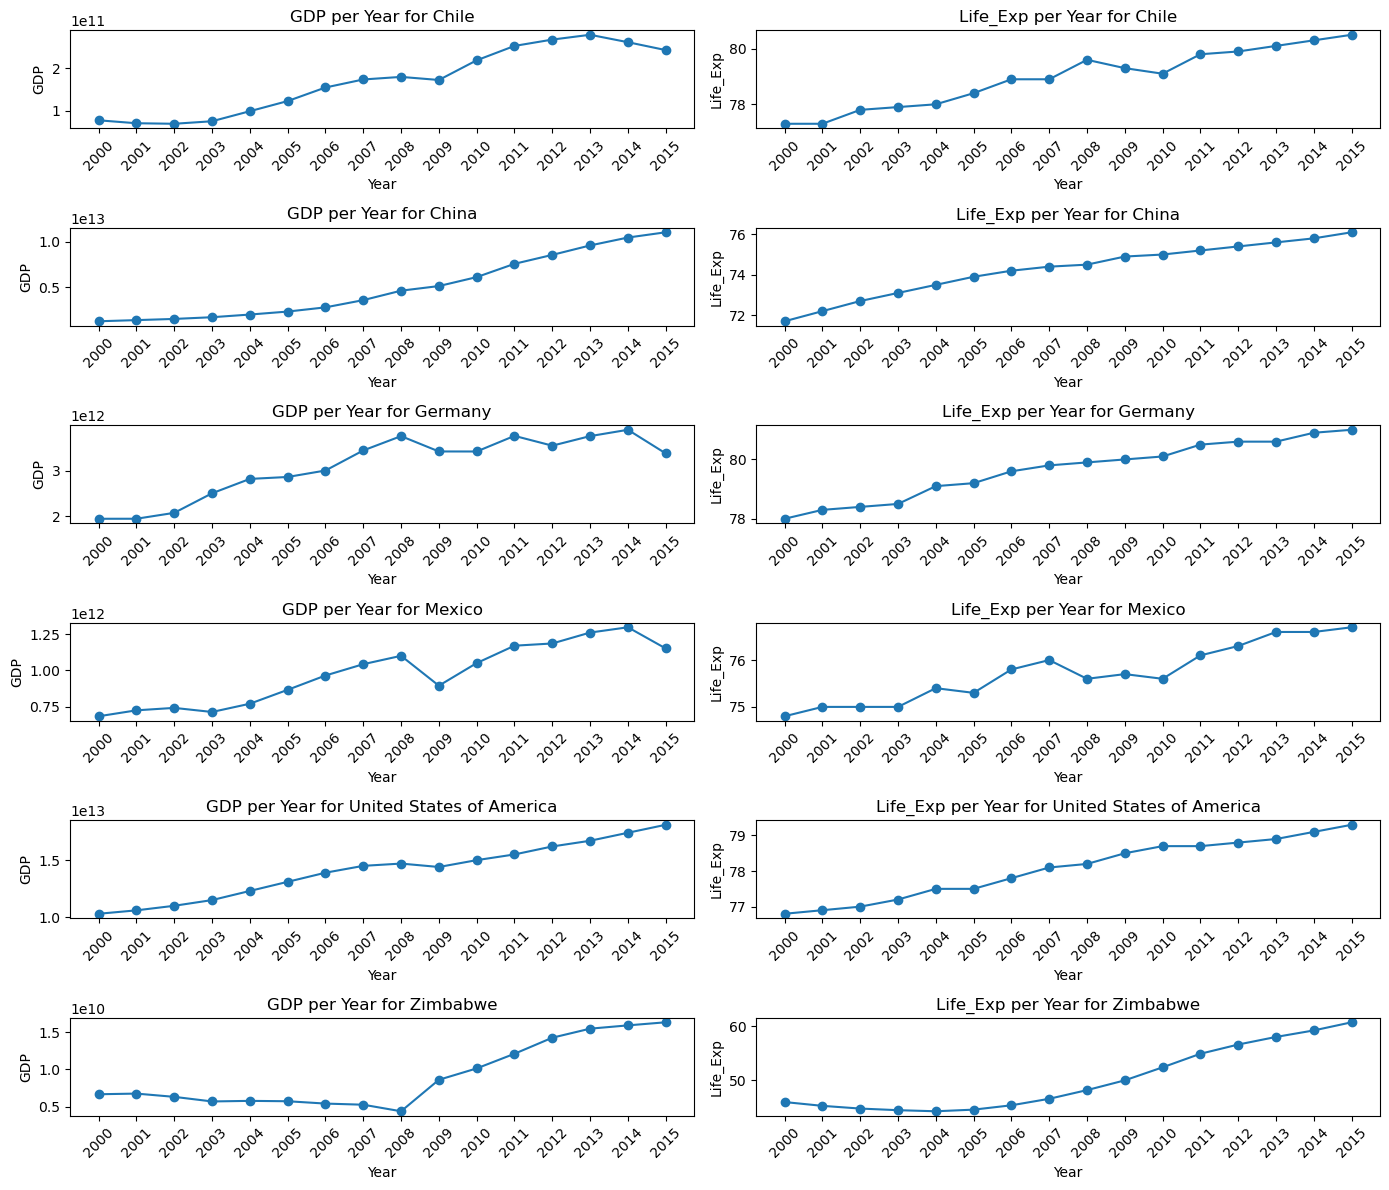

<Figure size 640x480 with 0 Axes>

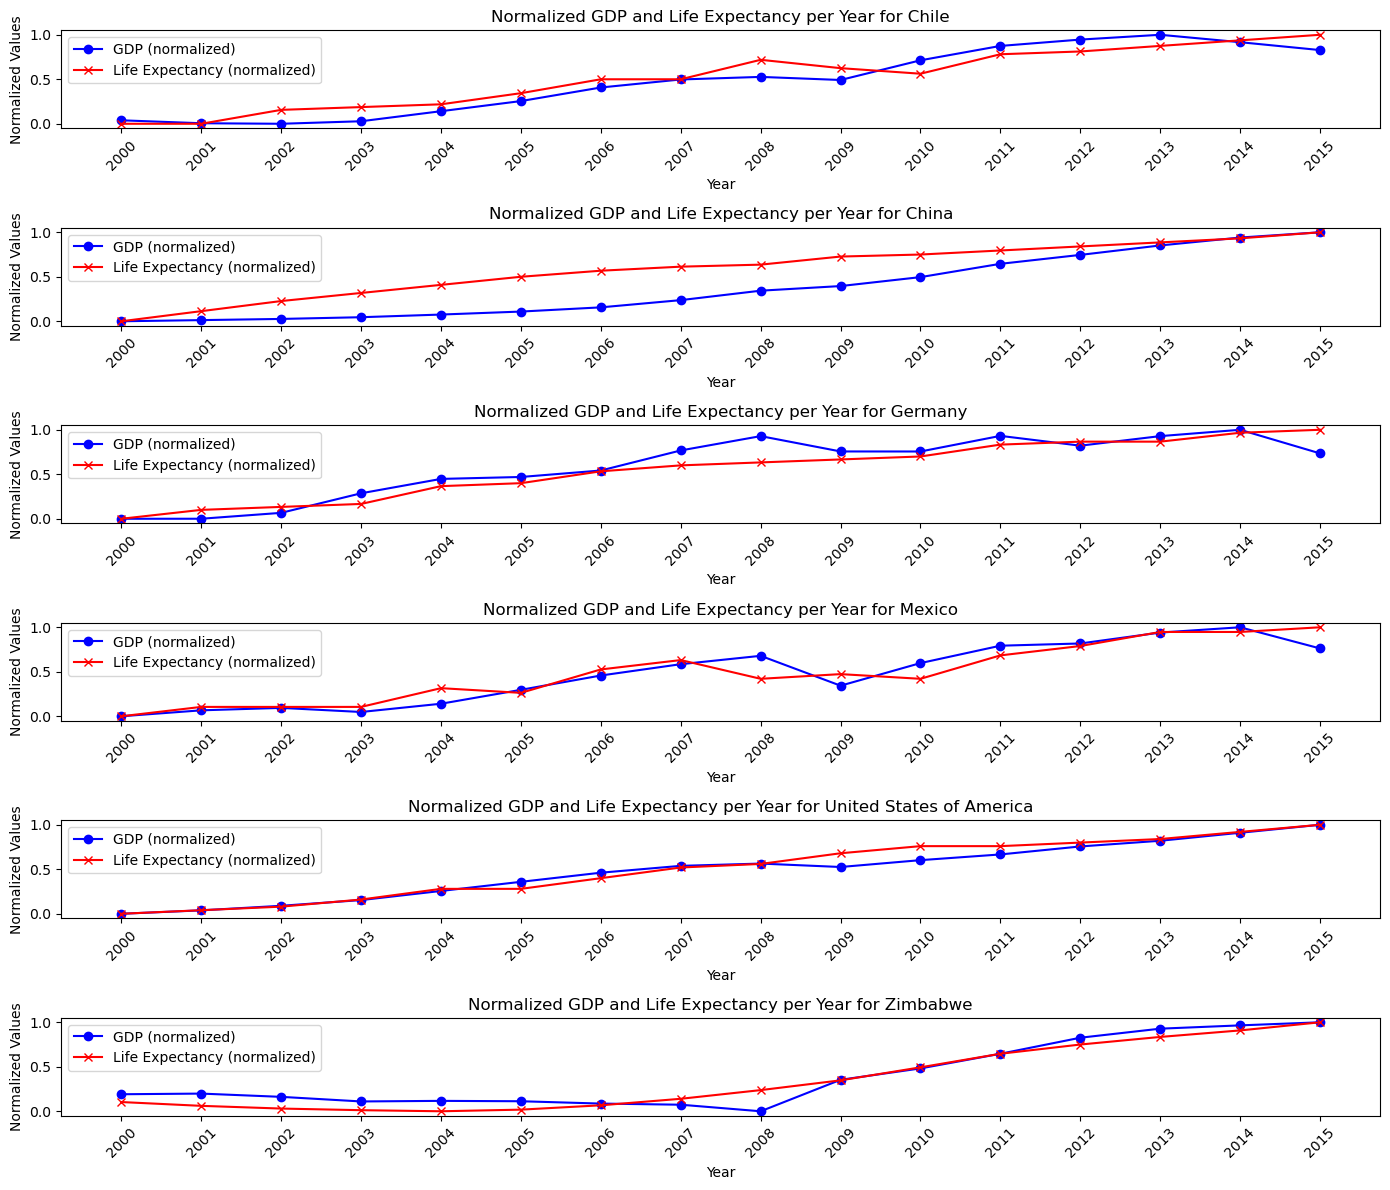

<Figure size 640x480 with 0 Axes>

In [203]:
plot_gdp_and_life_exp_per_year()
plot_normalized_gdp_and_life_exp_per_year()